## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Upscale the images by **4 times** on its respective dimensions. Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

# Setup

In [1]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from utils import display_images

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## Question 1

In [15]:
# Load the image
image = cv.imread("images/dog.jfif")

# Display the image in a window
cv.imshow("Displayed Image", image)

# Wait for a key press indefinitely or for a specific amount of time in milliseconds
key_press = cv.waitKey(0) & 0xFF

# If the 's' key is pressed, save the image as a PNG file
if key_press == ord('s'):
    cv.imwrite("dog_saved.png", image)

# Destroy all OpenCV windows
cv.destroyAllWindows()

## Question 2

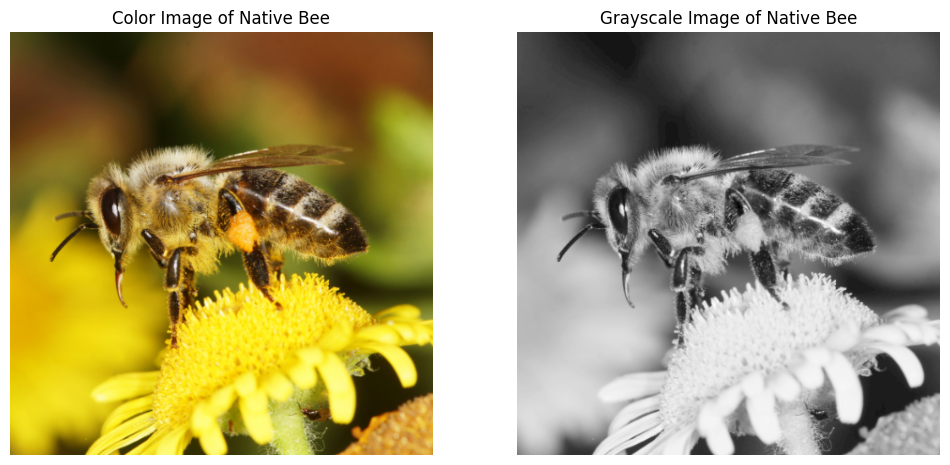

In [10]:
# Path to the uploaded image
image_path = "images/native-bee.png"

# Load the color and grayscale versions of the image
color_image = cv.imread(image_path)  # Color image
grayscale_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)  # Grayscale image

# Check if the images were successfully loaded
if color_image is None or grayscale_image is None:
    print("Error: One or both of the images could not be loaded. Please check the file path.")
else:
    # Convert the BGR color image to RGB for correct color representation with Matplotlib
    color_image_rgb = cv.cvtColor(color_image, cv.COLOR_BGR2RGB)

    # Create a plot with a specific size
    plt.figure(figsize=(12, 6))

    # Display the color image
    plt.subplot(1, 2, 1)
    plt.imshow(color_image_rgb)
    plt.title('Color Image of Native Bee')
    plt.axis('off')

    # Display the grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_image, cmap='gray')
    plt.title('Grayscale Image of Native Bee')
    plt.axis('off')

    # Show the plot with the images
    plt.show()

## Question 3

In [39]:

# Open the video file
video_path = "videos/img_pexels.mp4"
video_capture = cv.VideoCapture(video_path)

# Get the original dimensions of the video frames
original_width = int(video_capture.get(cv.CAP_PROP_FRAME_WIDTH))
original_height = int(video_capture.get(cv.CAP_PROP_FRAME_HEIGHT))

# Define new dimensions for resizing
resized_width = original_width // 2
resized_height = original_height // 2

# Set up the video writer with codec, FPS, and frame size
fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
frames_per_second = 60
output_video = cv.VideoWriter("resized_img_pexels.avi", fourcc, frames_per_second, (resized_width, resized_height))

while video_capture.isOpened():
    ret, frame = video_capture.read()  # 'ret' indicates if frame reading was successful

    if not ret:
        print("Error: Cannot read frame from video.")
        break

    # Resize the frame to the new dimensions
    resized_frame = cv.resize(frame, (resized_width, resized_height))
    cv.imshow("Resized Video", resized_frame)
    output_video.write(resized_frame)

    # Exit if the ESC key is pressed
    if cv.waitKey(1) & 0xFF == 27:
        break

# Release the video capture and writer objects
video_capture.release()
output_video.release()
cv.destroyAllWindows()

## Question 4

In [38]:
import time

# Load image
image = cv.imread("images/dog.jfif")

if image is None:
    raise Exception("Image not found!")

# Enlarge size
size = (image.shape[1] * 4, image.shape[0] * 4)

# Resize using linear interpolation
start_time = time.time()
linear = cv.resize(image, size, interpolation=cv.INTER_LINEAR)
linear_time = (time.time() - start_time) * 1000

# Resize using cubic interpolation
start_time = time.time()
cubic = cv.resize(image, size, interpolation=cv.INTER_CUBIC)
cubic_time = (time.time() - start_time) * 1000

# Resize using nearest neighbor interpolation
start_time = time.time()
nearest = cv.resize(image, size, interpolation=cv.INTER_NEAREST)
nearest_time = (time.time() - start_time) * 1000

# Display results
print(f"Linear Interpolation\nTime: {linear_time:.4f} ms")
print(f"Cubic Interpolation\nTime: {cubic_time:.4f} ms")
print(f"Nearest Neighbor\nTime: {nearest_time:.4f} ms")

display_images([image, linear, cubic, nearest], 
               titles=["Original", "Linear Interpolation", "Cubic Interpolation", "Nearest Neighbor"])

Linear Interpolation
Time: 1.0028 ms
Cubic Interpolation
Time: 1.5059 ms
Nearest Neighbor
Time: 1.5039 ms
